# Digit Classification using MNIST
#By- Aarush Kumar
#Dated: June 17,2021

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


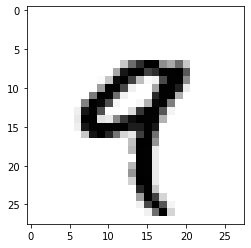

In [4]:
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=tf.keras.models.Sequential() #a feed forward model
model.add(tf.keras.layers.Flatten()) #takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #a simple fully connected layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [9]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', #how will we calculate the error to minimize the loss
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2601 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1042 - accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0719 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0321 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [10]:
val_loss,val_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1276 - accuracy: 0.9726


In [11]:
val_loss

0.12764662504196167

In [12]:
val_acc

0.972599983215332

In [13]:
model.save(r'/home/aarush100616/Downloads/Projects/Digit Classification/digit_model.model')

INFO:tensorflow:Assets written to: /home/aarush100616/Downloads/Projects/Digit Classification/digit_model.model/assets


In [14]:
new_model=tf.keras.models.load_model(r'/home/aarush100616/Downloads/Projects/Digit Classification/digit_model.model')
predictions=new_model.predict(x_test)

In [15]:
predictions[0]

array([9.4935138e-18, 4.1117960e-12, 1.0632927e-12, 5.9162814e-11,
       7.6037864e-19, 4.0274545e-16, 6.6268703e-22, 1.0000000e+00,
       2.7987658e-15, 2.1770636e-15], dtype=float32)

In [16]:
import numpy as np

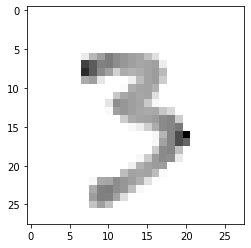

In [17]:
plt.imshow(x_test[30],cmap=plt.cm.binary)
plt.show()

In [18]:
np.argmax(predictions[30])

3